# Introducción
En este notebook vamos a hacer un pequeño análisis de los datos de Iris Plant, además
vamos a hacer la evaluación de dos modelos de clasificación, los cuales son:

- K-Nearest Neighbors
- Naive Bayes

Esto por su simplicidad y facilidad para explicar, además de que son modelos muy utilizados
en la industria, no obstante, a la hora de hacer un despliegue en producción, se puede aplicar
la misma lógica con cualquier otro modelo de clasificación implementado en scikit-learn.

# Desarrollo
Primero vamos a explorar los datos, después vamos a hacer un pequeño preprocesamiento y finalmente
vamos a entrenar los modelos y evaluarlos. Una vez evaluados, vamos a trasladar la idea a un archivo .py
para poder ser el modelo llamado desde FastAPI y poder implementar la API para hacer uso del modelo

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)
print(X[:5])

(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
# EDA - Exploratory Data Analysis
import pandas as pd

df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species'] = y
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [7]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


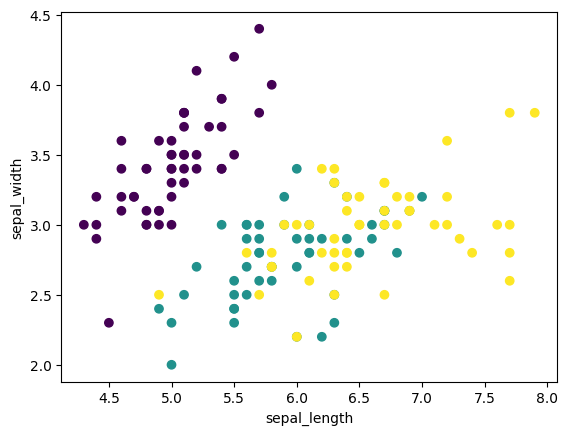

In [4]:
# Data Visualization
import matplotlib.pyplot as plt

plt.scatter(df['sepal_length'], df['sepal_width'], c=y)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

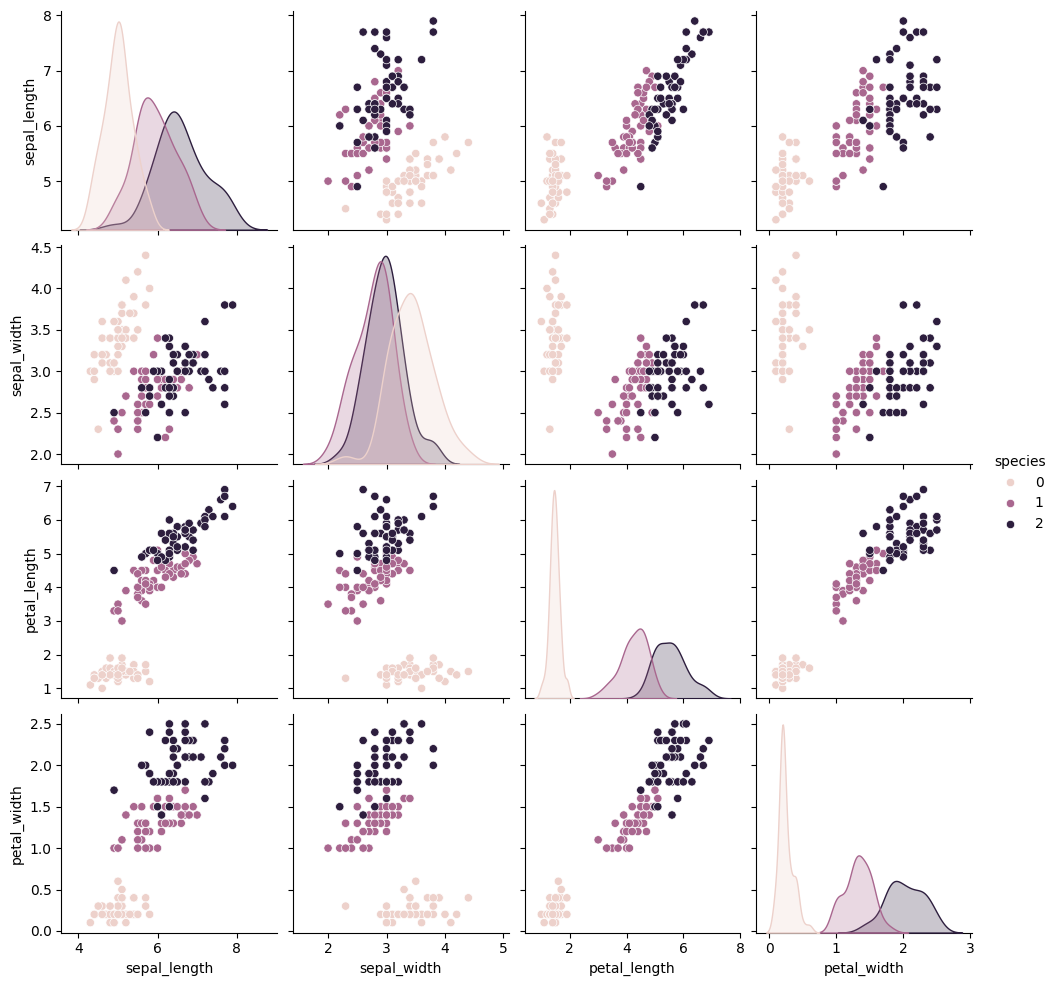

In [5]:
# pair plot
import seaborn as sns

sns.pairplot(df, hue='species')
plt.show()

# K-Nearest Neighbors

El algoritmo de los k vecinos más cercanos (KNN) es un algoritmo de clasificación supervisada que se basa en la idea de asignar una clase a un objeto basándose en la clase de los k vecinos más cercanos. Es un algoritmo muy simple y fácil de entender, pero a menudo es muy efectivo para problemas de clasificación.

## Pasos para implementar KNN
1. Elegir un valor arbitrario (impar) para k.
2. Calcular la distancia entre el nuevo punto y todos los puntos de entrenamiento.
3. Seleccionar los k puntos más cercanos al nuevo punto.
4. Asignar la clase al nuevo punto basándose en la clase mayoritaria de los k puntos más cercanos.


En este caso, vamos a implementar desde cero el algoritmo, aunque después entrenaremos y usaremos 
el modelo de scikit-learn para hacer la clasificación y posteriormente el despliegue.

In [1]:
import numpy as np


class KNearestNeighbors:
    def __init__(self, k: int) -> None:
        # Inicializar el número de vecinos más cercanos a considerar
        self.k = k

    def fit(self, X, y):
        # Almacenar el conjunto de entrenamiento
        # X es una matriz de características (n_muestras x n_características)
        # y es un vector de etiquetas correspondiente a cada muestra
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Predecir las etiquetas para el conjunto de datos X
        # X es una matriz de características (n_muestras_test x n_características)
        predictions = []

        # Iterar sobre cada muestra de prueba en X
        for x_test in X:
            # Calcular las distancias entre x_test y todas las muestras de entrenamiento
            distances = self._compute_distances(x_test)

            # Obtener los índices de los k vecinos más cercanos
            k_indices = np.argsort(distances)[: self.k]

            # Obtener las etiquetas de los k vecinos más cercanos
            k_nearest_labels = self.y_train[k_indices]

            # Determinar la etiqueta más común entre los vecinos
            label = self._majority_vote(k_nearest_labels)

            # Añadir la etiqueta predicha a la lista de predicciones
            predictions.append(label)

        # Devolver las etiquetas predichas como un arreglo de NumPy
        return np.array(predictions)

    def _compute_distances(self, x_test):
        # Calcular la distancia euclidiana entre x_test y todas las muestras de entrenamiento
        # Restar x_test de cada muestra de entrenamiento
        differences = self.X_train - x_test

        # Elevar al cuadrado las diferencias
        squared_differences = differences**2

        # Sumar las diferencias cuadradas a lo largo de las características (axis=1)
        sum_squared_differences = np.sum(squared_differences, axis=1)

        # Calcular la raíz cuadrada para obtener las distancias euclidianas
        distances = np.sqrt(sum_squared_differences)

        # Devolver un arreglo de distancias
        return distances

    def _majority_vote(self, labels):
        # Realizar una votación mayoritaria entre las etiquetas proporcionadas
        # Contar la frecuencia de cada etiqueta
        counts = np.bincount(labels)

        # Encontrar la etiqueta con la mayor frecuencia
        majority_label = np.argmax(counts)

        # Devolver la etiqueta mayoritaria
        return majority_label

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una instancia del clasificador k-NN con k=3
knn = KNearestNeighbors(k=3)

# Ajustar el clasificador con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
predictions = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Precisión del modelo k-NN: {accuracy:.2f}")

Precisión del modelo k-NN: 0.97


# Naive Bayes
El clasificador Naive Bayes es un clasificador probabilístico basado en el teorema de Bayes, que asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. Aunque es un clasificador simple, Naive Bayes ha demostrado ser muy efectivo en una variedad de problemas del mundo real.

## Pasos para implementar Naive Bayes
1. Calcular la probabilidad a priori de cada clase.
2. Calcular la probabilidad de cada característica para cada clase.
3. Multiplicar las probabilidades de cada característica para cada clase.
4. Asignar la clase basándose en la probabilidad mayor.


In [5]:
import numpy as np


class GaussianNaiveBayes:
    def __init__(self):
        # Inicializar las variables para almacenar las estadísticas de cada clase
        self.classes = None  # Lista de clases
        self.mean = {}  # Diccionario para almacenar las medias
        self.var = {}  # Diccionario para almacenar las varianzas
        self.priors = {}  # Diccionario para almacenar las probabilidades a priori

    def fit(self, X, y):
        # Entrenar el modelo con los datos X y etiquetas y
        # X es una matriz de características (n_muestras x n_características)
        # y es un vector de etiquetas correspondiente a cada muestra
        self.classes = np.unique(y)  # Obtener las clases únicas
        n_samples, n_features = X.shape

        # Calcular las estadísticas para cada clase
        for cls in self.classes:
            # Obtener las muestras que pertenecen a la clase cls
            X_c = X[y == cls]

            # Calcular la media y la varianza de cada característica para la clase cls
            self.mean[cls] = np.mean(X_c, axis=0)
            self.var[cls] = np.var(X_c, axis=0)

            # Calcular la probabilidad a priori de la clase cls
            self.priors[cls] = X_c.shape[0] / n_samples

    def predict(self, X):
        # Predecir las etiquetas para el conjunto de datos X
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_sample(self, x):
        # Calcular la probabilidad posterior para cada clase
        posteriors = []

        for cls in self.classes:
            # Calcular el logaritmo de la probabilidad a priori
            prior_log = np.log(self.priors[cls])

            # Calcular el logaritmo de la probabilidad de verosimilitud
            likelihood_log = self._compute_likelihood_log(cls, x)

            # Calcular el logaritmo de la probabilidad posterior
            posterior = prior_log + likelihood_log

            posteriors.append(posterior)

        # Seleccionar la clase con la probabilidad posterior más alta
        return self.classes[np.argmax(posteriors)]

    def _compute_likelihood_log(self, cls, x):
        # Calcular el logaritmo de la probabilidad de verosimilitud P(X|C) usando la distribución Gaussiana
        mean = self.mean[cls]
        var = self.var[cls]
        # Evitar divisiones por cero
        var[var == 0] = 1e-6

        # Calcular el logaritmo de la función de densidad de probabilidad Gaussiana
        numerator = -0.5 * ((x - mean) ** 2) / var
        denominator = -0.5 * np.log(2 * np.pi * var)
        log_likelihood = np.sum(numerator + denominator)

        return log_likelihood

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una instancia del clasificador Naive Bayes Gaussiano
gnb = GaussianNaiveBayes()

# Entrenar el modelo con los datos de entrenamiento
gnb.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = gnb.predict(X_test)

# Calcular la precisión del modelo
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Precisión del modelo Naive Bayes Gaussiano: {accuracy:.2f}")

Precisión del modelo Naive Bayes Gaussiano: 0.97
